In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
360,9294-TDIPC,Male,0,No,Yes,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,83.75,No
930,5146-CBVOE,Female,0,No,No,16,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),75.10,1212.85,No
5316,1470-PSXNM,Male,0,Yes,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,One year,Yes,Electronic check,93.65,4520.15,No
4994,9692-TUSXH,Female,0,No,No,18,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.05,1740.7,Yes
606,6516-NKQBO,Male,0,Yes,Yes,38,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),81.00,3084.9,No


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [6]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [8]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\Nishc\AppData\Local\Temp\ipykernel_22492\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


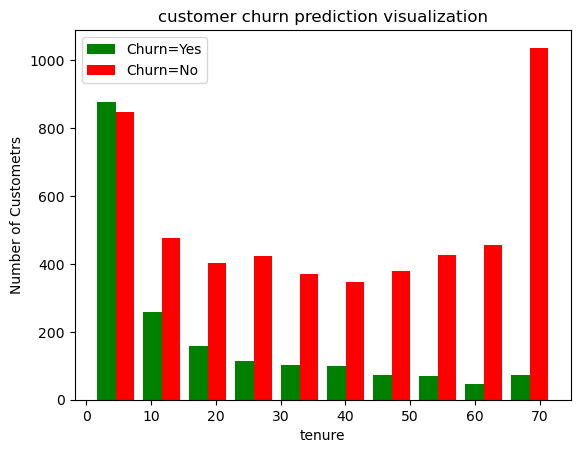

In [9]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure 
plt.xlabel("tenure")
plt.ylabel("Number of Custometrs")
plt.title("customer churn prediction visualization")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

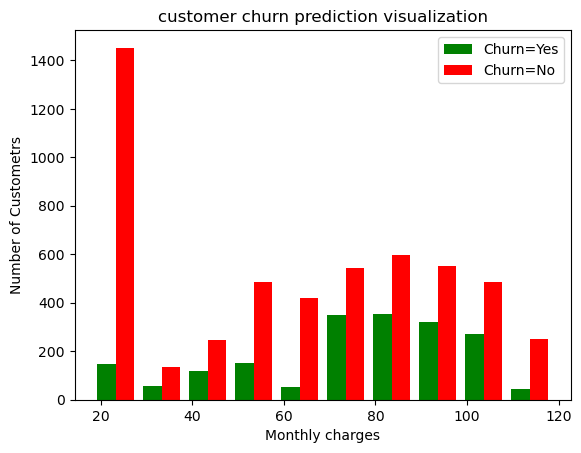

In [10]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel("Monthly charges")
plt.ylabel("Number of Custometrs")
plt.title("customer churn prediction visualization")
blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]
plt.hist([mc_churn_yes,mc_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [11]:

def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [12]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [13]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Nishc\AppData\Local\Temp\ipykernel_22492\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Nishc\AppData\Local\Temp\ipykernel_22492\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [14]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [15]:

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\Nishc\AppData\Local\Temp\ipykernel_22492\826058134.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
C:\Users\Nishc\AppData\Local\Temp\ipykernel_22492\826058134.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes': 1

In [16]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [17]:

df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\Nishc\AppData\Local\Temp\ipykernel_22492\1688734998.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
C:\Users\Nishc\AppData\Local\Temp\ipykernel_22492\1688734998.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].re

In [18]:

df1.gender.unique()

array([1, 0], dtype=int64)

In [19]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])

boolean_columns = df2.select_dtypes(include=['bool']).columns.tolist()
for col in boolean_columns:
    df2[col] = df2[col].astype(int)

df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [20]:

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [21]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [23]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'), 
    keras.layers.Dense(1,activation='sigmoid'), 
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 3s 4ms/step - loss: 0.5826 - accuracy: 0.6668
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4437 - accuracy: 0.7895
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4275 - accuracy: 0.7966
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4215 - accuracy: 0.8009
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4174 - accuracy: 0.8009
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4154 - accuracy: 0.8034
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4143 - accuracy: 0.8060
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4130 - accuracy: 0.8044
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.8068
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4107 - accura

In [24]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4476 - accuracy: 0.7825


[0.4476468563079834, 0.7825160026550293]

In [25]:
yp=model.predict(x_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.30369174],
       [0.48715267],
       [0.00633658],
       [0.65943176],
       [0.3436003 ]], dtype=float32)

In [26]:
y_pred=[]
for element in yp:
    if element >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [27]:

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       999
           1       0.68      0.48      0.56       408

    accuracy                           0.78      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

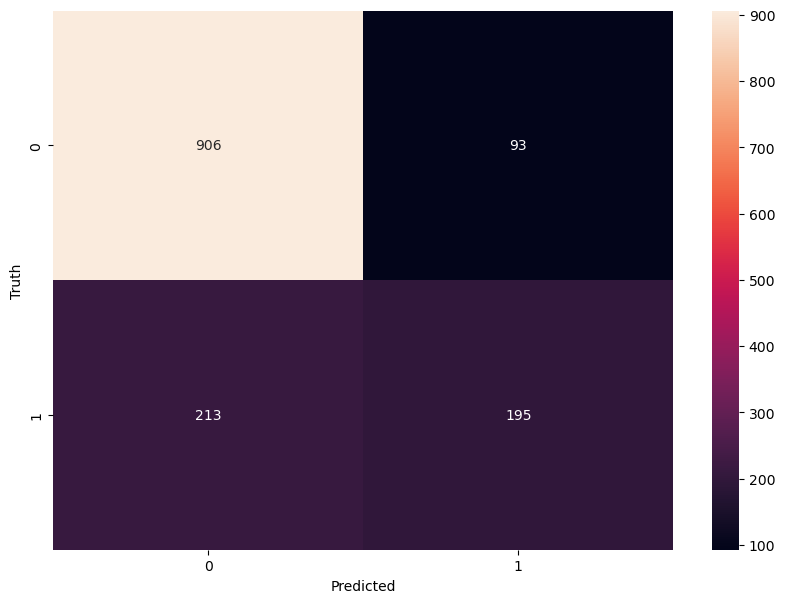

In [28]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')



In [40]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [47]:

y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 5ms/step - loss: 0.6160 - accuracy: 0.6699
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5281 - accuracy: 0.7542
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4971 - accuracy: 0.7629
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4868 - accuracy: 0.7635
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4817 - accuracy: 0.7676
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4775 - accuracy: 0.7749
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4753 - accuracy: 0.7729
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4727 - accuracy: 0.7756
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4696 - accuracy: 0.7786
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4681 - accuracy: 0.7739
Epoch 11/

In [29]:
count_class_0,count_class_1=df.Churn.value_counts()
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [30]:
df_class_0.shape

(5163, 27)

In [32]:
df_class_1.shape



(1869, 27)

In [33]:
df_class_0.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5104,1,0,1,0,0.239437,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6477,0,1,1,0,1.000000,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0


In [38]:
df_class_0_under=df_class_0.sample(count_class_1)
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
print('Random-sampling')
print(df_test_under.Churn.value_counts())


Random-sampling
Churn
0    1869
1    1869
Name: count, dtype: int64


In [39]:
x=df_test_under.drop('Churn',axis='columns')
y=df_test_under['Churn']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [46]:
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [48]:

y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 6ms/step - loss: 0.6250 - accuracy: 0.6552
Epoch 2/100
94/94 [==============================] - 1s 8ms/step - loss: 0.5164 - accuracy: 0.7512
Epoch 3/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4959 - accuracy: 0.7622
Epoch 4/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4874 - accuracy: 0.7635
Epoch 5/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4823 - accuracy: 0.7642
Epoch 6/100
94/94 [==============================] - 1s 12ms/step - loss: 0.4800 - accuracy: 0.7642
Epoch 7/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4767 - accuracy: 0.7656
Epoch 8/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4753 - accuracy: 0.7686
Epoch 9/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4717 - accuracy: 0.7719
Epoch 10/100
94/94 [==============================] - 1s 10ms/step - loss: 0.4704 - accuracy: 0.7736
Epoch 1

###
Method2: Oversampling

In [49]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
1    5174
0    5163
Name: count, dtype: int64


In [50]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [51]:
y_train.value_counts()

Churn
1    4139
0    4130
Name: count, dtype: int64

In [52]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 6ms/step - loss: 0.5299 - accuracy: 0.7367
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4911 - accuracy: 0.7583
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4864 - accuracy: 0.7642
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4822 - accuracy: 0.7645
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4792 - accuracy: 0.7693
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4753 - accuracy: 0.7710
Epoch 7/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4729 - accuracy: 0.7742
Epoch 8/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4701 - accuracy: 0.7748
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4680 - accuracy: 0.7762
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4662 - accura

## Method3: SMOTE

In [53]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [59]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [58]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

c:\Users\Nishc\anaconda3\envs\pydpgpu\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Nishc\anaconda3\envs\pydpgpu\lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Churn
0    5163
1    5163
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [56]:
y_train.value_counts()

Churn
1    4139
0    4130
Name: count, dtype: int64

In [60]:

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 3s 8ms/step - loss: 0.5686 - accuracy: 0.7262
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4950 - accuracy: 0.7616
Epoch 3/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4879 - accuracy: 0.7625
Epoch 4/100
259/259 [==============================] - 2s 9ms/step - loss: 0.4842 - accuracy: 0.7639
Epoch 5/100
259/259 [==============================] - 2s 8ms/step - loss: 0.4806 - accuracy: 0.7647
Epoch 6/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4779 - accuracy: 0.7642
Epoch 7/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4737 - accuracy: 0.7700
Epoch 8/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4708 - accuracy: 0.7690
Epoch 9/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4679 - accuracy: 0.7736
Epoch 10/100
259/259 [==============================] - 2s 8ms/step - loss: 0.4648 - accura

##
Method4: Use of Ensemble with undersampling

In [61]:

df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [62]:

df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [65]:

y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [66]:

df3 = X_train.copy()
df3['Churn'] = y_train

In [67]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [68]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [69]:

X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 6ms/step - loss: 0.6055 - accuracy: 0.6963
Epoch 2/100
94/94 [==============================] - 1s 13ms/step - loss: 0.5170 - accuracy: 0.7528
Epoch 3/100
94/94 [==============================] - 1s 16ms/step - loss: 0.4962 - accuracy: 0.7645
Epoch 4/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4869 - accuracy: 0.7679
Epoch 5/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4831 - accuracy: 0.7719
Epoch 6/100
94/94 [==============================] - 1s 11ms/step - loss: 0.4785 - accuracy: 0.7709
Epoch 7/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4765 - accuracy: 0.7716
Epoch 8/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4740 - accuracy: 0.7759
Epoch 9/100
94/94 [==============================] - 1s 10ms/step - loss: 0.4726 - accuracy: 0.7786
Epoch 10/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4706 - accuracy: 0.7776
Epoch

In [70]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 7ms/step - loss: 0.6521 - accuracy: 0.6254
Epoch 2/100
94/94 [==============================] - 1s 7ms/step - loss: 0.5348 - accuracy: 0.7411
Epoch 3/100
94/94 [==============================] - 1s 9ms/step - loss: 0.5050 - accuracy: 0.7602
Epoch 4/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4927 - accuracy: 0.7645
Epoch 5/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4856 - accuracy: 0.7669
Epoch 6/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4796 - accuracy: 0.7699
Epoch 7/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4786 - accuracy: 0.7642
Epoch 8/100
94/94 [==============================] - 1s 11ms/step - loss: 0.4733 - accuracy: 0.7739
Epoch 9/100
94/94 [==============================] - 1s 10ms/step - loss: 0.4741 - accuracy: 0.7692
Epoch 10/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4698 - accuracy: 0.7689
Epoch 1

In [71]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 7ms/step - loss: 0.6244 - accuracy: 0.6846
Epoch 2/100
83/83 [==============================] - 0s 6ms/step - loss: 0.5144 - accuracy: 0.7602
Epoch 3/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4912 - accuracy: 0.7693
Epoch 4/100
83/83 [==============================] - 1s 6ms/step - loss: 0.4833 - accuracy: 0.7723
Epoch 5/100
83/83 [==============================] - 1s 6ms/step - loss: 0.4777 - accuracy: 0.7719
Epoch 6/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4743 - accuracy: 0.7780
Epoch 7/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4691 - accuracy: 0.7837
Epoch 8/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4665 - accuracy: 0.7825
Epoch 9/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4659 - accuracy: 0.7803
Epoch 10/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4622 - accuracy: 0.7848
Epoch 11/

In [72]:
len(y_pred1)

1407

In [73]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [74]:

cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1033
           1       0.47      0.80      0.59       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.79      0.70      0.72      1407

